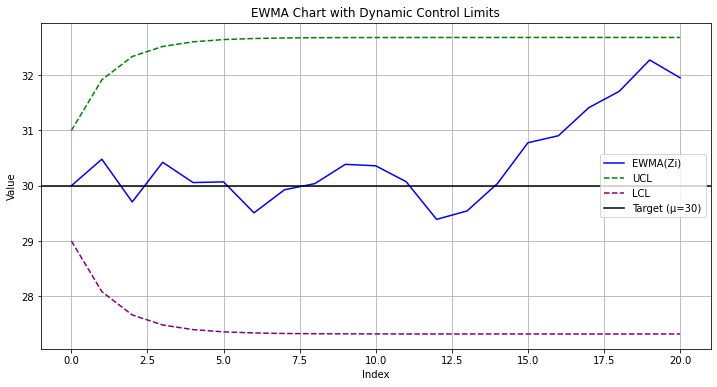

,Werte,EWMA(Zi),UCL,LCL,LambdaXi,(1-lambda)Zi-1
0,0.0,30.000000,31.000000,29.000000,0.00,0.000000
1,31.6,30.480000,31.917000,28.083000,9.48,21.000000
2,27.9,29.706000,32.339997,27.660003,8.37,21.336000
3,32.1,30.424200,32.521493,27.478507,9.63,20.794200
4,29.2,30.056940,32.605815,27.394185,8.76,21.296940
5,30.1,30.069858,32.646152,27.353848,9.03,21.039858
6,28.2,29.508901,32.665695,27.334305,8.46,21.048901
7,30.9,29.926230,32.675219,27.324781,9.27,20.656230
8,30.3,30.038361,32.679873,27.320127,9.09,20.948361
9,31.2,30.386853,32.682150,27.317850,9.36,21.026853


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = np.array([0,31.6, 27.9, 32.1, 29.2, 30.1, 28.2, 30.9, 30.3, 31.2, 30.3, 29.4, 27.8, 29.9, 31.2, 32.5, 31.2, 32.6, 32.4, 33.6, 31.2])
df = pd.DataFrame(data, columns=["Werte"])

# Initialwert und Parameter
mu = 30
alpha = 0.3
L = 3
sigma = 2.13


df['EWMA(Zi)'] = 0
df.loc[0, 'EWMA(Zi)'] = mu 
df['UCL'] = mu + 1
df['LCL'] = mu - 1

df['LambdaXi'] = 0
df['(1-lambda)Zi-1'] = 0


# EWMA-Werte und dynamische Kontrollgrenzen berechnen
for i in range(1, len(df)):
    df.loc[i, 'EWMA(Zi)'] = (alpha * df.loc[i, 'Werte']) + ((1 - alpha) * df.loc[i-1, 'EWMA(Zi)'])
    df.loc[i, 'LambdaXi'] = (0.3 * df.loc[i, 'Werte'])
    df.loc[i, '(1-lambda)Zi-1'] = ((1 - 0.3) * df.loc[i-1, 'EWMA(Zi)'])
    dynamic_sigma = sigma * np.sqrt(alpha / (2 - alpha) * (1 - (1 - alpha)**(2 * i)))
    df.loc[i, 'UCL'] = mu + L * dynamic_sigma
    df.loc[i, 'LCL'] = mu - L * dynamic_sigma
    




plt.figure(figsize=(12, 6))
plt.plot(df.index, df['EWMA(Zi)'], label='EWMA(Zi)', color='blue')
#plt.plot(df.index, df['Werte'], label='Werte', color='red', linestyle='--')
plt.plot(df.index, df['UCL'], label='UCL', color='green', linestyle='--')
plt.plot(df.index, df['LCL'], label='LCL', color='purple', linestyle='--')
plt.axhline(y=mu, color='black', linestyle='-', label='Target (µ=30)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('EWMA Chart with Dynamic Control Limits')
plt.legend()
plt.grid(True)
plt.savefig("ewma_plot.jpeg", format='jpeg')
plt.show()
df